### Day 1 Modification

In [1]:
directives = open('../directives.txt').read()
print(directives)

Directives:


> Data Acquisition
    - Kaggle Dataset (Only the `non-emergency` type vehicles)
    - Web Scrape (Scrape vehicle images that runs in the Philippine roads (PUJ/PUV) and `emergency` type vehicles. Will be done using `Selenium` framework.)
    - Google Map Street View (Manually screen-shot street view images in google maps for clearer and more refined images.)

> Localization Model
    - Pre-trained YOLO v5
        -The pre-trained YOLO v5 model is capable of detecting 80 different types of objects, including various types of vehicles. In this study, the researchers are focused on detecting cars, buses, trains, trucks, and motorcycles. Each of these labels has been assigned a unique key by the model. To use YOLO v5 for their purposes, the researchers will only include the keys for the vehicle classes that they are interested in when initializing the model. This will allow them to suppress the detection of other types of objects.
        
> Data Preprocessing (For classifica

**Web Scraping**

In [2]:
from modules.image_scraper import ImageScraper
import time

DRIVER_PATH = r"modules/chromedriver.exe"

*Non-Emergency Vehicles*

In [7]:
jeepney = ImageScraper(DRIVER_PATH, 'Jeepney', 80).fetch_image_array()
time.sleep(5)

Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
-------------------------------------------------------
Accessing Jeepney URLs to fetch images
Unable to open the image.
Unable to open the image.
Extracted 78 images out of 80


In [8]:
taxi = ImageScraper(DRIVER_PATH, 'Philippine Taxi', 80).fetch_image_array()
time.sleep(5)

Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
-------------------------------------------------------
Accessing Philippine Taxi URLs to fetch images
Extracted 80 images out of 80


In [9]:
tricycle = ImageScraper(DRIVER_PATH, 'Philippine Tricyle', 80).fetch_image_array()
time.sleep(5)

Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
-------------------------------------------------------
Accessing Philippine Tricyle URLs to fetch images
Unable to open the image.
Extracted 79 images out of 80


In [3]:
bus = ImageScraper(DRIVER_PATH, 'Bus', 50).fetch_image_array()
time.sleep(5)

Found: 100 search results. Extracting links from 0:100
Found: 50 image links, done!
-------------------------------------------------------
Accessing Bus URLs to fetch images
Unable to open the image.
Unable to open the image.
Unable to open the image.
Extracted 47 images out of 50


In [4]:
van = ImageScraper(DRIVER_PATH, 'Van Vehicle', 50).fetch_image_array()
time.sleep(5)

Found: 100 search results. Extracting links from 0:100
Found: 50 image links, done!
-------------------------------------------------------
Accessing Van Vehicle URLs to fetch images
Unable to open the image.
Unable to open the image.
Extracted 48 images out of 50


*Emergency Vehicles*

In [30]:
ambulance = ImageScraper(DRIVER_PATH, 'Philippine Ambulance', 80).fetch_image_array()

Found: 100 search results. Extracting links from 0:100
Found: 81 image links, done!
-------------------------------------------------------
Accessing Philippine Ambulance URLs to fetch images
Unable to open the image.
Unable to open the image.
Unable to open the image.
Unable to open the image.
Extracted 77 images out of 80


In [31]:
firetruck = ImageScraper(DRIVER_PATH, 'Philippine Firetruck', 80).fetch_image_array()

Found: 100 search results. Extracting links from 0:100
Found: 80 image links, done!
-------------------------------------------------------
Accessing Philippine Firetruck URLs to fetch images
Unable to open the image.
Unable to open the image.
Unable to open the image.
Extracted 77 images out of 80


In [32]:
police = ImageScraper(DRIVER_PATH, 'Philippine Police Vehicle', 80).fetch_image_array()

Found: 100 search results. Extracting links from 0:100
Found: 81 image links, done!
-------------------------------------------------------
Accessing Philippine Police Vehicle URLs to fetch images
Unable to open the image.
Unable to open the image.
Unable to open the image.
Unable to open the image.
Extracted 77 images out of 80


In [33]:
non_emergency = [j for i in [jeepney, taxi, tricycle, bus, van] for j in i]
emergency = [j for i in [ambulance, firetruck, police] for j in i]

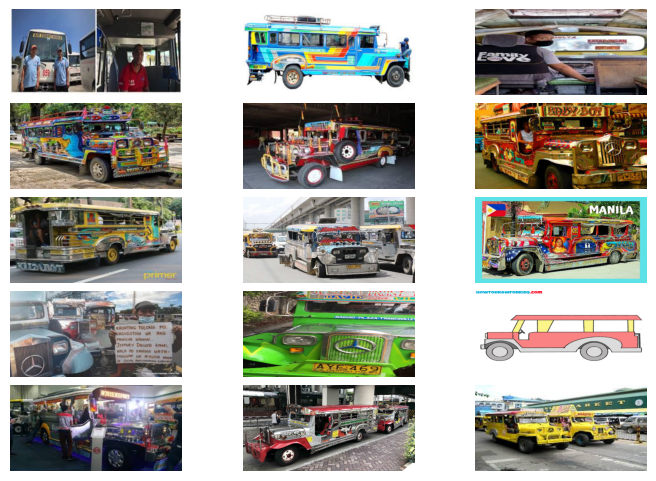

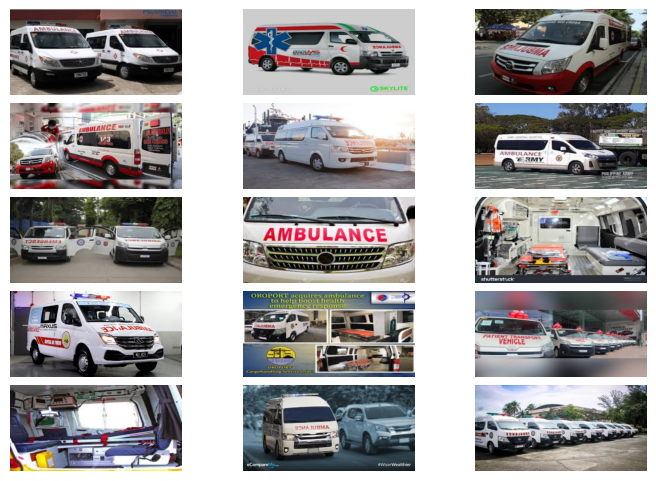

In [34]:
import cv2
import matplotlib.pyplot as plt

def display_image(img_array, rows=5, cols=3):
    size = (500, 250)
    fig, axs = plt.subplots(rows, cols, figsize=(12, 6))
    idx = 0
    for i in range(rows):
        for j in range(cols):
            resized_image = cv2.resize(img_array[idx], size)
            axs[i,j].imshow(resized_image)
            axs[i, j].axis("off")
            idx += 1
    plt.subplots_adjust(wspace=-0.5, hspace=0.1)
    plt.show()
    
display_image(non_emergency)
display_image(emergency)

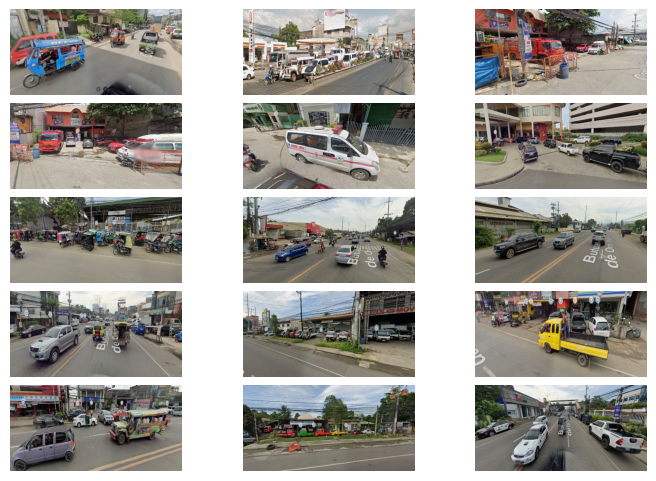

In [47]:
import os
%matplotlib inline
jonzee_dir = '../DATASET DIR/Dataset_Jonzee'
jonzee_arr = [plt.imread(os.path.join(jonzee_dir, i)) for i in os.listdir(jonzee_dir)]
display_image(jonzee_arr)

## Localization

In [45]:
from modules.localize_dataset import LocalizationModel

vehicles = {
    2:'car',
    5:'bus', 
    6:'train', 
    7:'truck', 
}

localizer = LocalizationModel(classes=list(vehicles.keys()), conf=0.55)

Using cache found in C:\Users\brian/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-28 Python-3.9.0 torch-1.13.1+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [48]:
localized_scraped_non_emergency = localizer.localize(non_emergency)
localized_scraped_emergency = localizer.localize(emergency)

  0%|          | 0/332 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

In [49]:
localized_jonzee = localizer.localize(jonzee_arr)

  0%|          | 0/75 [00:00<?, ?it/s]

%matplotlib inline
display_image(localized_scraped_non_emergency)
display_image(localized_scraped_emergency)
display_image(localized_jonzee)

In [54]:
print(f"Localized scraped emergency vehicles: {len(localized_scraped_emergency)}")
print(f"Localized scraped non-emergency vehicles: {len(localized_scraped_non_emergency)}")
print(f"Localized Jonzee Dataset: {len(localized_jonzee)}")

Localized scraped emergency vehicles: 339
Localized scraped non-emergency vehicles: 383
Localized Jonzee Dataset: 368


%matplotlib inline
for i in range(50):
    plt.imshow(localized_scraped_emergency[i])
    plt.show()

from PIL import Image

for i in localized_scraped_emergency[:20]:
    img_array = cv2.resize(i, (224, 224))
    display(Image.fromarray(img_array))
    
<!-- #     save_or_not = input("save or not [y/n]")
#     if save_or_not == 'y':
#         emergency_or_not = input("emergency or not [y/n]")
#         if emergency_or_not == 'y':
#             print("this is an emergency vehicle")
#         elif emergency_or_not == 'n':
#             print("this is an not an emergency vehicle")
#     else:
#         print('rejecting') -->

In [66]:
DIR = '../DATASET DIR/Dataset_Kaggle/Emergency_Vehicles'
os.listdir(DIR)

['sample_submission.csv', 'test', 'test.csv', 'train', 'train.csv']

In [99]:
import pandas as pd
import numpy as np

df = pd.read_csv(os.path.join(DIR, 'train.csv'))
df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [100]:
img_path = [os.path.join(DIR, 'train', i) for i in df['image_names']]

pil_img = []
for i in img_path:
    img_arr = plt.imread(i)
    img_arr = cv2.resize(img_arr, (224, 224))
    pil_img.append(Image.fromarray(img_arr))
    
df['image'] = pil_img

In [101]:
zeros = df[df['emergency_or_not'] == 0]['image'].tolist()
ones = df[df['emergency_or_not'] == 1]['image'].tolist()

In [109]:
from tqdm import tqdm_notebook
from warnings import filterwarnings as fws
fws('ignore')

def resize_and_save_images(image_list, width, height, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    for i, image in tqdm_notebook(enumerate(image_list)):
        pil_image = Image.fromarray(image)
        pil_image = pil_image.resize((width, height), Image.ANTIALIAS)
        pil_image.save(os.path.join(directory, 'image_{}.png'.format(i)))

In [110]:
resize_and_save_images([np.asarray(i) for i in ones], 224, 224, 'output/ones')

0it [00:00, ?it/s]

In [126]:
from keras.models import load_model
from PIL import Image, ImageOps #Install pillow instead of PIL
import numpy as np
np.set_printoptions(suppress=True)

classifier = load_model('teachable/keras_model.h5', compile=False)
# class_names = open('/kaggle/input/classifier/labels.txt', 'r').readlines()

class_names = ['emergency', 'non_emergency']
def classify(img_arr):
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.fromarray(img_arr).convert('RGB')
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    prediction = classifier.predict(data, verbose=0)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]
    
    return class_name

In [113]:
classify(localized_scraped_emergency[0])

'100.0% emergency'

In [127]:
classify(localized_jonzee[0])

'non_emergency'

%matplotlib inline
for i in localized_jonzee[:20]:
    img_arr = cv2.resize(i, (224, 224))
    plt.imshow(img_arr)
    plt.title(classify(img_arr))
    plt.show()

In [150]:
def resize_and_save_images(image_list, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    for i, image in tqdm_notebook(enumerate(image_list), desc='saving...'):
        pil_image = Image.fromarray(image)
        pil_image = pil_image.resize((224, 224), Image.ANTIALIAS)
        pred = classify(image)
        if pred == 'emergency':
            path = os.path.join(directory, 'emergency')
            if not os.path.exists(path):
                os.makedirs(path)
            pil_image.save(os.path.join(path, 'image_{}.png'.format(i)))
            
        elif pred == 'non_emergency':
            path = os.path.join(directory, 'non_emergency')
            if not os.path.exists(path):
                os.makedirs(path)
            pil_image.save(os.path.join(path, 'image_{}.png'.format(i)))

In [164]:
merged = localized_jonzee + localized_scraped_non_emergency + localized_scraped_emergency

resize_and_save_images(merged, 'output_dataset_raw')

saving...: 0it [00:00, ?it/s]

### Day 2 Modification

In [9]:
import os
from PIL import Image
import numpy as np
import cv2

DIR = 'output_dataset_raw'
os.listdir(DIR)

['emergency', 'non_emergency']

In [99]:
from tqdm import tqdm_notebook

def manual_check(img_path, return_rejected=True):
    rejected = []
    for i in tqdm_notebook(range(len(img_path))):
        try:
            image = Image.open(img_path[i])
            display(image)

            user_input = input("KEEP IMAGE? [Y/N]: ").upper()
            if user_input == 'Y':
                print(f'KEEPING {img_path[i]}')
            elif user_input == 'N':
                print(f'DELETING {img_path[i]}')
                rejected.append(np.asarray(image))
                os.remove(img_path[i])
            else:
                raise ValueError
        except ValueError:
            print("ENTER EITHER [Y/N]")
    if return_rejected:
        return (img for img in rejected)


img_path = [os.path.join(DIR, 'emergency', image) for image in os.listdir(os.path.join(DIR, 'emergency'))]
print(f"length of images: {len(img_path)}")

rejected_emergency = manual_check(img_path, return_rejected=True)

non_emergency_img_path = [os.path.join(DIR, 'non_emergency', image) for image in os.listdir(os.path.join(DIR, 'non_emergency'))]
print(f"length of images: {len(non_emergency_img_path)}")

rejected_non_emergency = manual_check(non_emergency_img_path, return_rejected=True)

In [103]:
def save_rejected(generator, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    for i, image in enumerate(generator):
        pil_image = Image.fromarray(image)
        pil_image.save(os.path.join(directory, 'image_{}.png'.format(i)))

In [104]:
save_rejected(rejected_emergency, 'rejected/emergency')

In [105]:
save_rejected(rejected_non_emergency, 'rejected/non_emergency')

### Day 3 Modification

In [41]:
import pandas as pd
from PIL import Image
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

kaggle_dataset_path = '../DATASET DIR/Dataset_Kaggle/Emergency_Vehicles'
os.listdir(kaggle_dataset_path)

['sample_submission.csv', 'test', 'test.csv', 'train', 'train.csv']

In [42]:
df = pd.read_csv(os.path.join(kaggle_dataset_path, 'train.csv'))
df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [48]:
kaggle_image_paths = []
for i in df['image_names']:
    img_path = os.path.join(kaggle_dataset_path, 'train', i)
    if os.path.exists(img_path):
        kaggle_image_paths.append(img_path)
        
df['paths'] = kaggle_image_paths
df.head()

,image_names,emergency_or_not,paths
0,1503.jpg,0,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
1,1420.jpg,0,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
2,1764.jpg,0,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
3,1356.jpg,0,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
4,1117.jpg,0,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...


C:\Users\brian\AppData\Local\Temp\ipykernel_6828\2456777671.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  img_array = [plt.imread(i) for i in tqdm_notebook(df['paths'])]


  0%|          | 0/1646 [00:00<?, ?it/s]

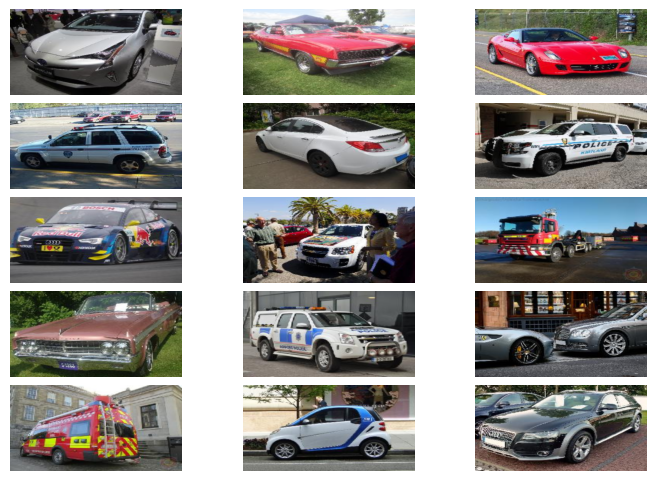

In [51]:
def display_image(img_array, rows=5, cols=3):
    size = (500, 250)
    fig, axs = plt.subplots(rows, cols, figsize=(12, 6))
    idx = 0
    for i in range(rows):
        for j in range(cols):
            resized_image = cv2.resize(img_array[idx], size)
            axs[i,j].imshow(resized_image)
            axs[i, j].axis("off")
            idx += 1
    plt.subplots_adjust(wspace=-0.5, hspace=0.1)
    plt.show()
    
img_array = [plt.imread(i) for i in tqdm_notebook(df['paths'])]
display_image(img_array)

In [52]:
zeros = df[df['emergency_or_not'] == 0]['paths'].tolist()
ones = df[df['emergency_or_not'] == 1]['paths'].tolist()

In [66]:
from warnings import filterwarnings as fws
fws('ignore')

c = 0
for class_, path in tqdm_notebook(zip([zeros, ones], ['output_dataset_raw/non_emergency/', 'output_dataset_raw/emergency/'])):
    for img in class_:
        pil_img = Image.open(img)
        pil_img.save(os.path.join(path, f'kaggle_{c}.png'))
        c += 1

0it [00:00, ?it/s]

In [61]:
df[df['emergency_or_not'] == 1]

,image_names,emergency_or_not,paths
5,45.jpg,1,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
8,294.jpg,1,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
10,588.jpg,1,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
12,736.jpg,1,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
16,436.jpg,1,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
...,...,...,...
1632,769.jpg,1,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
1634,130.jpg,1,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
1637,330.jpg,1,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...
1639,466.jpg,1,../DATASET DIR/Dataset_Kaggle/Emergency_Vehicl...


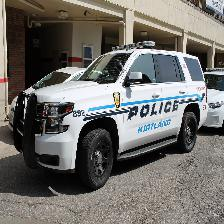

In [64]:
Image.open(ones[0])